In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_excel('survey_data.xlsx', skiprows=3)
data.drop(columns='Counter', inplace=True)
data.head()

,Survey Year,Timestamp,SalaryUSD,Country,PostalCode,PrimaryDatabase,YearsWithThisDatabase,OtherDatabases,EmploymentStatus,JobTitle,...,TelecommuteDaysPerWeek,NewestVersionInProduction,OldestVersionInProduction,PopulationOfLargestCityWithin20Miles,EmploymentSector,LookingForAnotherJob,CareerPlansThisYear,Gender,OtherJobDuties,KindsOfTasksPerformed
0,2021,2020-12-10 08:22:42.696,65000.0,Sweden,NaN,Microsoft SQL Server,4,Microsoft SQL Server,Full time employee,"Developer: Business Intelligence (SSRS, PowerB...",...,Not Asked,SQL Server 2016,SQL Server 2016,"<= 20,000 (town)",Private business,Not Asked,"Stay with the same employer, same role",Male,Not Asked,Not Asked
1,2021,2020-12-10 08:23:22.242,145000.0,United States,76063,Microsoft SQL Server,15,Azure SQL DB (any flavor),Full time employee,DBA (Production Focus - build & troubleshoot s...,...,Not Asked,SQL Server 2019,SQL Server 2014,1M+ (metropolis),Private business,Not Asked,"Stay with the same employer, same role",Male,Not Asked,Not Asked
2,2021,2020-12-10 08:23:37.909,105000.0,United States,43240,Microsoft SQL Server,12,"PostgreSQL, Azure SQL DB (any flavor)",Full time employee,DBA (General - splits time evenly between writ...,...,Not Asked,SQL Server 2017,SQL Server 2008R2,300K-1M (large city),Private business,Not Asked,"Stay with the same employer, same role",Male,Not Asked,Not Asked
3,2021,2020-12-10 08:23:48.152,46482.0,United Kingdom,NaN,Microsoft SQL Server,10,Azure SQL DB (any flavor),Full time employee,DBA (Production Focus - build & troubleshoot s...,...,Not Asked,SQL Server 2019,SQL Server 2012,300K-1M (large city),"Education (K-12, college, university)",Not Asked,"Stay with the same employer, same role",Male,Not Asked,Not Asked
4,2021,2020-12-10 08:24:03.600,98800.0,United States,468,Microsoft SQL Server,5,DB2,Full time employee,"Developer: Business Intelligence (SSRS, PowerB...",...,Not Asked,SQL Server 2019,SQL Server 2012,100K-299K (city),Private business,Not Asked,"Stay with the same employer, same role",Male,Not Asked,Not Asked


# Cleaning

In [3]:
data.describe()

,Survey Year,SalaryUSD,YearsWithThisDatabase,YearsWithThisTypeOfJob
count,10341.000000,1.034100e+04,10341.000000,10341.000000
mean,2018.644812,9.472364e+04,20.040615,8.227638
std,1.461710,6.137334e+04,608.141658,28.616040
min,2017.000000,1.300000e+01,0.000000,0.000000
25%,2017.000000,6.589000e+04,5.000000,3.000000
50%,2018.000000,9.100000e+04,10.000000,6.000000
75%,2020.000000,1.156000e+05,15.000000,10.000000
max,2021.000000,1.850000e+06,53716.000000,2020.000000


In [4]:
data['HoursWorkedPerWeek'].replace('Not Asked', 0, inplace=True)
data[data['HoursWorkedPerWeek'] > data['HoursWorkedPerWeek'].quantile(.999)][['HoursWorkedPerWeek']].sort_values('HoursWorkedPerWeek')

data.loc[7371, 'HoursWorkedPerWeek'] = data['HoursWorkedPerWeek'].mean()

## Outliers

<AxesSubplot:xlabel='YearsWithThisDatabase', ylabel='Count'>

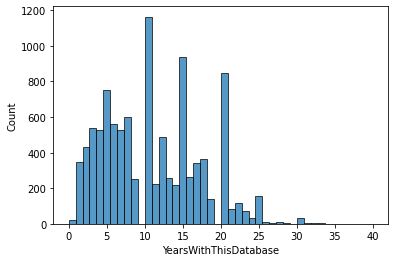

In [5]:
data[data['YearsWithThisDatabase'] > data['YearsWithThisDatabase'].quantile(.999)][['YearsWithThisDatabase']].sort_values('YearsWithThisDatabase')
data[data['YearsWithThisDatabase'] > 40] = data['YearsWithThisDatabase'].mean()
data.describe()
sns.histplot(data=data['YearsWithThisDatabase'])

<AxesSubplot:xlabel='YearsWithThisTypeOfJob', ylabel='Count'>

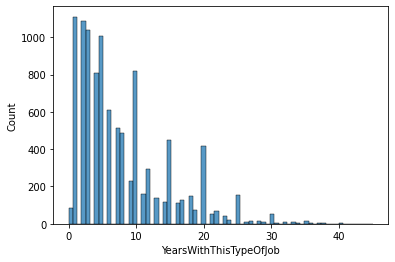

In [6]:
data[data['YearsWithThisTypeOfJob'] > data['YearsWithThisTypeOfJob'].quantile(.999)][['YearsWithThisTypeOfJob']].sort_values('YearsWithThisTypeOfJob')
data.at[628,'YearsWithThisTypeOfJob'] = data['YearsWithThisTypeOfJob'].mean()
sns.histplot(data=data['YearsWithThisTypeOfJob'])

# Bugged/Duplicate Rows

In [7]:
data['EmploymentStatus'].value_counts()
data[data['EmploymentStatus']== 20.040615027560197]
data.drop(data[data['EmploymentStatus']== 20.040615027560197].index, inplace=True, axis=0)

In [8]:
data['JobTitle'].value_counts()

DBA (General - splits time evenly between writing & tuning queries AND building & troubleshooting servers)    1906
DBA                                                                                                           1514
DBA (Production Focus - build & troubleshoot servers, HA/DR)                                                  1228
Developer: T-SQL                                                                                               994
Architect                                                                                                      794
Developer: Business Intelligence (SSRS, PowerBI, etc)                                                          737
Developer: App code (C#, JS, etc)                                                                              679
Manager                                                                                                        625
Analyst                                                                         

# Remove Irrelevant Columns

In [9]:
data.drop(['PostalCode', 'Timestamp', 'Gender'], axis=1, inplace=True)

In [10]:
data.columns
data.rename(columns={"Survey Year": "SurveyYear"}, inplace=True)

[Text(0.5, 0, 'Survey Year'), Text(0, 0.5, 'Reponses')]

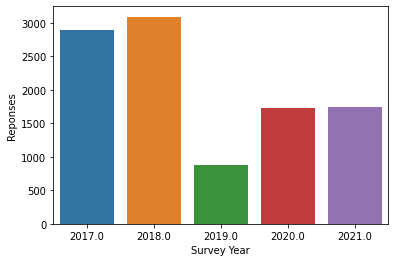

In [11]:
data.groupby('SurveyYear').mean()
responses_count_by_year = data['SurveyYear'].value_counts().to_frame().sort_index().reset_index()
sns.barplot(data=responses_count_by_year, x='index', y='SurveyYear').set(xlabel='Survey Year', ylabel='Reponses')

[Text(0.5, 0, 'Survey Year'), Text(0, 0.5, 'Average Salary (USD)')]

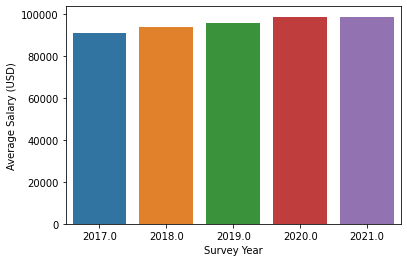

In [12]:
average_by_year = data.groupby('SurveyYear').mean().reset_index()
sns.barplot(data=average_by_year, x='SurveyYear', y='SalaryUSD').set(xlabel='Survey Year', ylabel='Average Salary (USD)')

In [13]:
jobs = ['Data Analyst', 'Data Engineer', 'Data Scientist']

data['JobTitle'] = data['JobTitle'].str.replace('Analyst','Data Analyst').replace('Engineer', 'Data Engineer')

<AxesSubplot:ylabel='Respondents'>

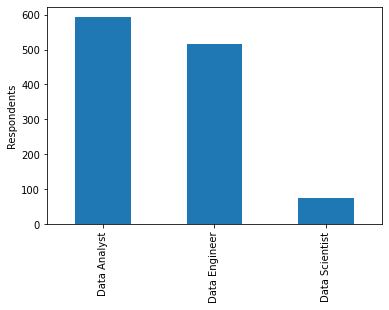

In [14]:
filtered_data = data[(data['JobTitle'] =='Data Analyst') | (data['JobTitle'] =='Data Engineer')| (data['JobTitle'] =='Data Scientist')]

job_counts = filtered_data['JobTitle'].value_counts().to_frame().reset_index()
job_counts.plot(kind='bar', x='index', xlabel='', ylabel='Respondents', legend=None)

In [15]:

avg_salaries

NameError: name 'avg_salaries' is not defined

[Text(0.5, 0, 'Job Title'), Text(0, 0.5, 'Average Salary (USD)')]

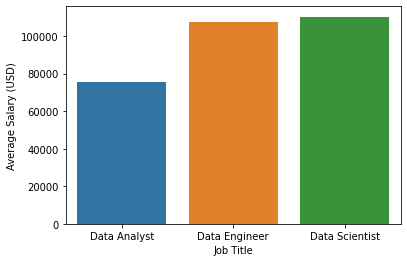

In [ ]:
data['JobTitle'].unique()
avg_salaries = filtered_data.groupby('JobTitle').mean()['SalaryUSD'].to_frame().reset_index()
sns.barplot(data = avg_salaries, x='JobTitle', y='SalaryUSD').set(xlabel='Job Title', ylabel='Average Salary (USD)')

In [ ]:
education = filtered_data[filtered_data['Education'] != 'Not Asked'].groupby('JobTitle')['Education'].value_counts().to_frame()

Education
JobTitle       Education                            
Data Analyst   Bachelors (4 years)               179
               Masters                            71
               None (no degree completed)         55
               Associates (2 years)               45
               Doctorate/PhD                       3
Data Engineer  Bachelors (4 years)               162
               None (no degree completed)         62
               Masters                            50
               Associates (2 years)               24
               Doctorate/PhD                       1
Data Scientist Masters                            13
               Bachelors (4 years)                 8
               Doctorate/PhD                       3
               None (no degree completed)          3
               Associates (2 years)                1

<AxesSubplot:xlabel='JobTitle,Education'>

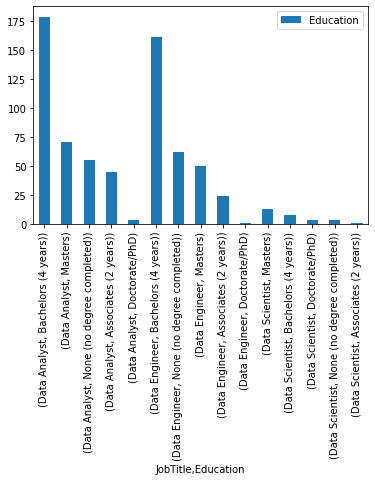

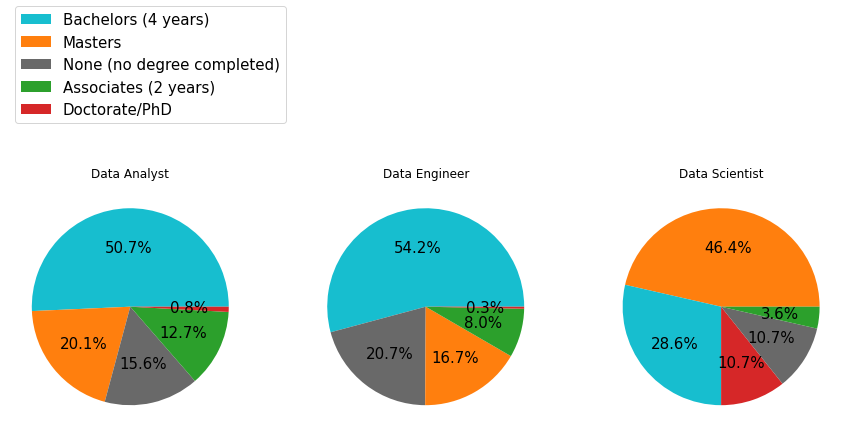

In [ ]:
education = dict.fromkeys(jobs)

for job in jobs:
    education[job] = data[data['JobTitle'] == job]['Education'].value_counts().to_frame().drop('Not Asked')

pie, ax = plt.subplots(ncols=3, figsize=[15,6])
plt.subplots_adjust(hspace=0)

colors = {
    'Bachelors (4 years)': 'tab:cyan', 
    'Masters': 'tab:orange',
    'None (no degree completed)': 'dimgrey',
    'Associates (2 years)': 'tab:green',
    'Doctorate/PhD': 'tab:red'
}

for i, job in enumerate(jobs):
    education[job].plot(kind='pie', 
                        y='Education', 
                        autopct="%.1f%%", 
                        ax=ax[i], 
                        legend=False, 
                        title=job, 
                        ylabel='', 
                        colors=[colors[ed] for ed in education[job].index],
                        fontsize=15,
                        labels=None)
ax[0].legend(bbox_to_anchor=(0, 1.75), loc='upper left', ncol=1, labels=education['Data Analyst'].index, prop={'size': 15})



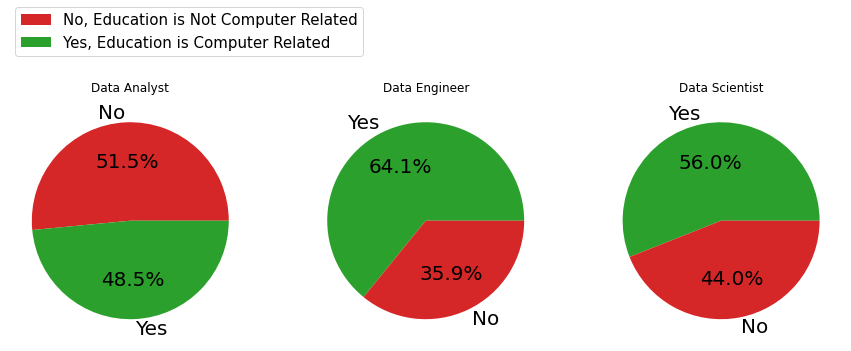

In [ ]:
computer_related = dict.fromkeys(jobs)

for job in jobs:
    computer_related[job] = data[data['JobTitle'] == job]['EducationIsComputerRelated'].value_counts().to_frame().drop('Not Asked')

pie, ax = plt.subplots(ncols=3, figsize=[15,6])


colors={
    'Yes': 'tab:green',
    'No' : 'tab:red'
}

for i, job in enumerate(jobs):
    computer_related[job].plot(kind='pie', 
                        y='EducationIsComputerRelated', 
                        autopct="%.1f%%", 
                        ax=ax[i], 
                        legend=False, 
                        title=job, 
                        ylabel='',
                        colors=[colors[v] for v in computer_related[job].index],
                        fontsize=20)

ax[0].legend(bbox_to_anchor=(0, 1.4), loc='upper left', ncol=1, labels=['No, Education is Not Computer Related', 'Yes, Education is Computer Related'], prop={'size': 15})


In [ ]:
data[data['JobTitle'] == 'Analyst']['HoursWorkedPerWeek']

avg_hours = dict.fromkeys(jobs)
for job in jobs:
    avg_hours[job] = data[(data['JobTitle'] == job) & (data['HoursWorkedPerWeek'] != 'Not Asked')]['HoursWorkedPerWeek'].mean()

avg_hours    

{'Data Analyst': 24.846543001686342,
 'Data Engineer': 25.623300970873785,
 'Data Scientist': 17.08108108108108}

In [ ]:
print(str(type('hi')))

<class 'str'>


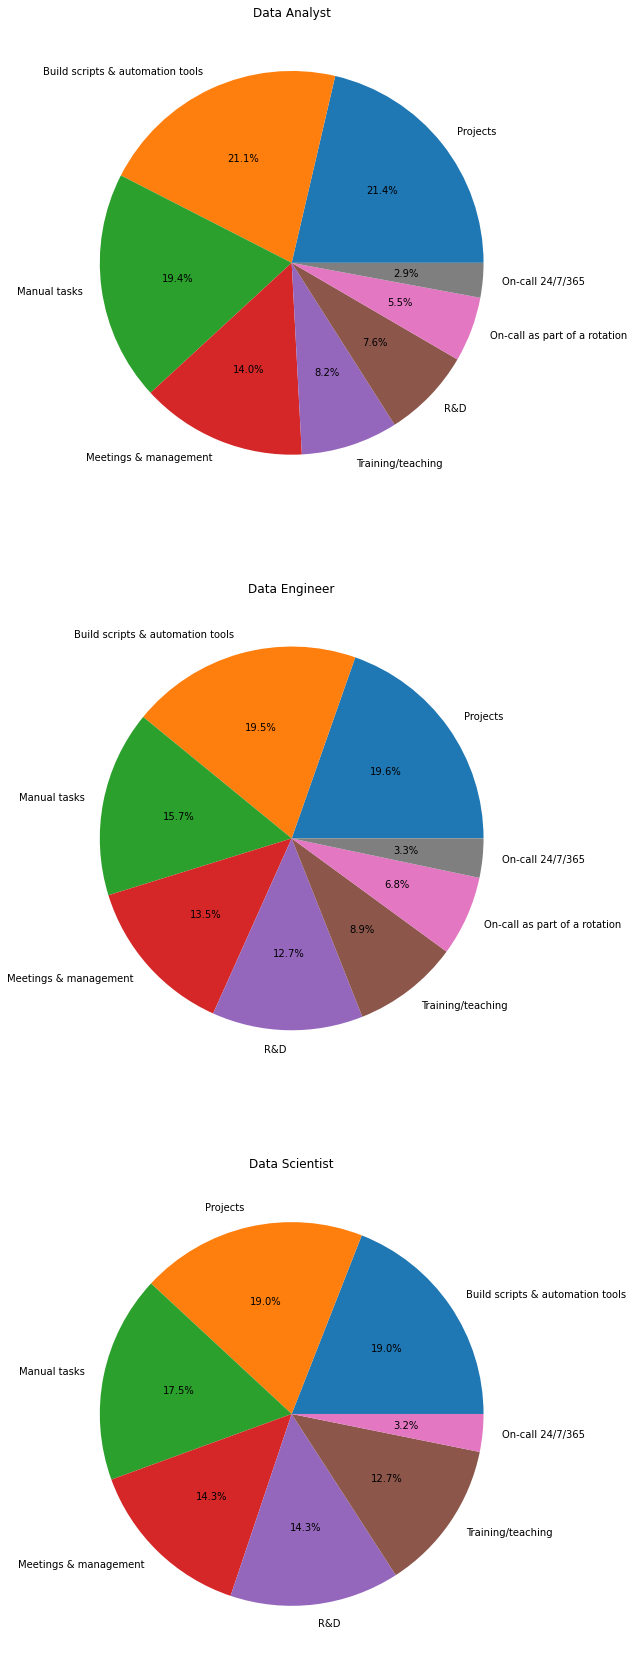

In [21]:
def get_task_counts(job_title):
    tasks_total = {}
    for row in data[(data['JobTitle']==job_title) & (data['KindsOfTasksPerformed'] != np.nan)]['KindsOfTasksPerformed']:
        if isinstance(row, str):
            tasks = row.split(', ')
        for task in tasks:
            if task not in tasks_total.keys():
                tasks_total[task] = 1
            else:
                tasks_total[task] += 1

    return pd.DataFrame.from_dict(tasks_total, orient='index', columns=['Count']).drop(['Not Asked'], axis=0).sort_values('Count', ascending=False)


pie, ax = plt.subplots(nrows=3, figsize=[25,30])
for i, job in enumerate(jobs):
    get_task_counts(job).plot(kind='pie', 
                                y='Count', 
                                autopct="%.1f%%", 
                                ax=ax[i], 
                                legend=False, 
                                title=job, 
                                ylabel='')